## Iris Classification

#### Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

#### load Data

In [3]:
iris = load_iris() # iris dataset (dictionary)

In [4]:
print('iris target values:\n', iris.target)
print('iris target name:\n', iris.target_names)

iris target values:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target name:
 ['setosa' 'versicolor' 'virginica']


In [5]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['label'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# 초기 모델은 랜덤하게 주어진 뒤, 데이터가 입력되며 학습해나가므로 초기값에 영향을 받아 무작위값 활용에 있어 시드 고정
np.random.seed(2022)
X = data.drop('label', axis='columns')
y = data.label
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

#### Model

In [7]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

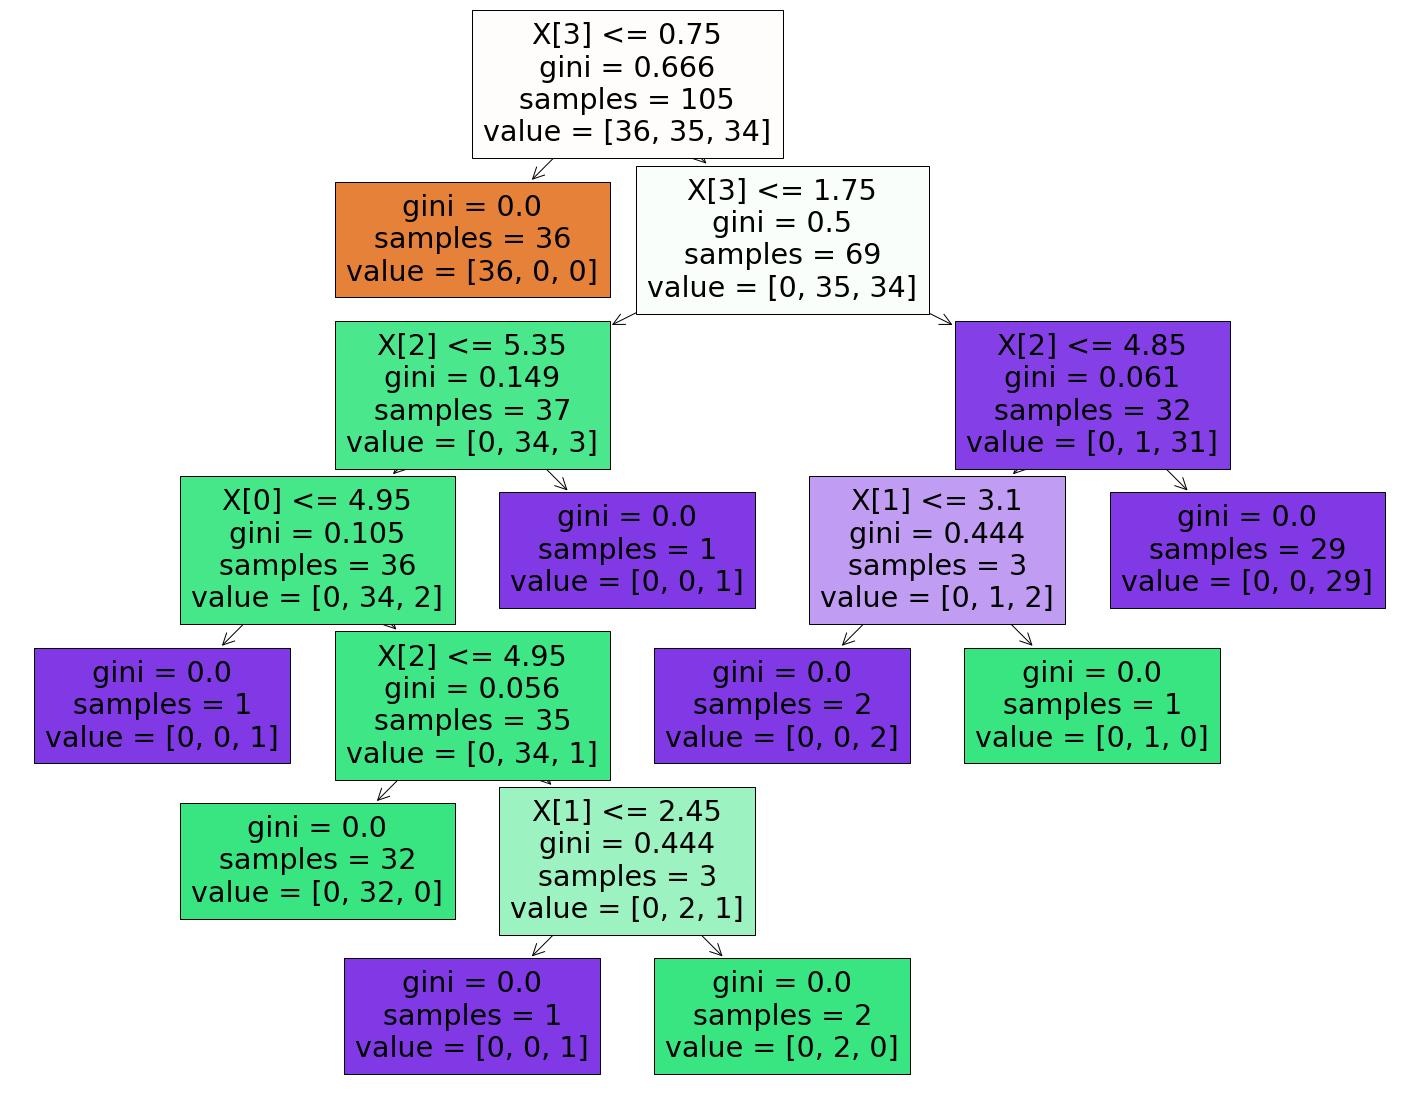

In [9]:
plt.figure(figsize=(25,20))
plot_tree(dt, filled=True)
plt.show()

In [10]:
pred = dt.predict(X_test)

In [11]:
accuracy_score(y_test, pred)

0.9555555555555556

#### K-Fold & StratifiedKFold

In [19]:
kfold = KFold(n_splits=5)
cv_accuracy=[]

In [26]:
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)

    acc = np.around(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(acc)

print(cv_accuracy)
print('평균 검증 정확도:', np.mean(cv_accuracy))

[1.0, 0.9667, 0.8667, 0.9333, 0.7333]
평균 검증 정확도: 0.9


In [27]:
data.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [31]:
n_iter = 0
for train_idx, test_idx in kfold.split(X):
    n_iter += 1
    y_train, y_test = y[train_idx], y[test_idx]
    print('-----교차 검증-----:', n_iter)
    print('1) 학습 데이터 분포\n', y_train.value_counts())
    print('2) 검증 데이터 분포\n', y_test.value_counts())

-----교차 검증-----: 1
1) 학습 데이터 분포
 1    50
2    50
0    20
Name: label, dtype: int64
2) 검증 데이터 분포
 0    30
Name: label, dtype: int64
-----교차 검증-----: 2
1) 학습 데이터 분포
 2    50
1    40
0    30
Name: label, dtype: int64
2) 검증 데이터 분포
 0    20
1    10
Name: label, dtype: int64
-----교차 검증-----: 3
1) 학습 데이터 분포
 0    50
2    50
1    20
Name: label, dtype: int64
2) 검증 데이터 분포
 1    30
Name: label, dtype: int64
-----교차 검증-----: 4
1) 학습 데이터 분포
 0    50
1    40
2    30
Name: label, dtype: int64
2) 검증 데이터 분포
 2    20
1    10
Name: label, dtype: int64
-----교차 검증-----: 5
1) 학습 데이터 분포
 0    50
1    50
2    20
Name: label, dtype: int64
2) 검증 데이터 분포
 2    30
Name: label, dtype: int64


In [32]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_idx, test_idx in skf.split(X, y):
    n_iter +=1
    y_train, y_test = y[train_idx], y[test_idx]

    print('-----교차 검증-----:', n_iter)
    print('1) 학습 데이터 분포\n', y_train.value_counts())
    print('2) 검증 데이터 분포\n', y_test.value_counts())

-----교차 검증-----: 1
1) 학습 데이터 분포
 2    34
0    33
1    33
Name: label, dtype: int64
2) 검증 데이터 분포
 0    17
1    17
2    16
Name: label, dtype: int64
-----교차 검증-----: 2
1) 학습 데이터 분포
 1    34
0    33
2    33
Name: label, dtype: int64
2) 검증 데이터 분포
 0    17
2    17
1    16
Name: label, dtype: int64
-----교차 검증-----: 3
1) 학습 데이터 분포
 0    34
1    33
2    33
Name: label, dtype: int64
2) 검증 데이터 분포
 1    17
2    17
0    16
Name: label, dtype: int64


In [35]:
cv_accuracy = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)

    acc = np.around(accuracy_score(y_test, pred), 4)
    cv_accuracy.append(acc)

print(cv_accuracy)
print('평균 검증 정확도:', np.mean(cv_accuracy))

[0.98, 0.94, 1.0]
평균 검증 정확도: 0.9733333333333333


In [36]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=5)
print(scores)
print('평균 검증 정확도:', np.mean(scores))

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
평균 검증 정확도: 0.9600000000000002
